## 1st-Level Clustering (RFM and "tof")

### K-Means Clustering

/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

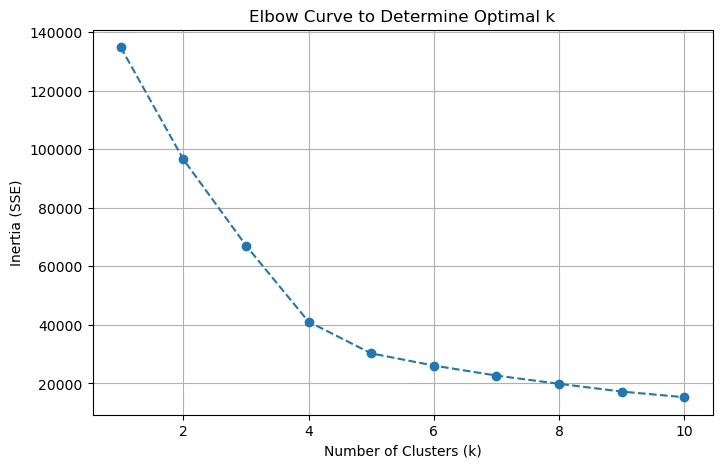

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Ecommerce data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract relevant columns for RFM and TOF analysis
rfm_tof = data[['r', 'f', 'm', 'tof']].dropna()

# Scale the data (if not already scaled)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_tof[['r', 'f', 'm', 'tof']])

# Determine the optimal number of clusters using the Elbow Method
inertia = []  # Sum of squared distances to cluster centers
k_range = range(1, 11)  # Test cluster numbers from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Curve to Determine Optimal k')
plt.grid()
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

# KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(scaled_data)
silhouette_4 = silhouette_score(scaled_data, labels_4)

# KMeans with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(scaled_data)
silhouette_5 = silhouette_score(scaled_data, labels_5)

print(f"Silhouette Score for 4 clusters: {silhouette_4}")
print(f"Silhouette Score for 5 clusters: {silhouette_5}")

/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 4 clusters: 0.49104297076243486
Silhouette Score for 5 clusters: 0.4843162075686842


In [30]:
# Add the cluster labels to the dataframe
rfm_tof['KMeans_4_Cluster'] = labels_4

# Summarize clusters with descriptive statistics
cluster_summary_4 = rfm_tof.groupby('KMeans_4_Cluster').agg({
    'r': ['mean', 'std', 'min', 'max'],
    'f': ['mean', 'std', 'min', 'max'],
    'm': ['mean', 'std', 'min', 'max'],
    'tof': ['mean', 'std', 'min', 'max'],
    'KMeans_4_Cluster': 'count'
}).rename(columns={'KMeans_4_Cluster': 'Count'})

# Display the summary
print(cluster_summary_4)

                            r                                 f                \
                         mean         std  min   max       mean       std min   
KMeans_4_Cluster                                                                
0                 1356.619671  434.986228  501  2460   3.161721  2.353487   1   
1                  252.404125  226.196636    1  1537  12.873335  9.110559   2   
2                  116.666667   65.225251   69   191  10.666667  7.505553   3   
3                  259.306760  216.222799    0   942   2.701050  2.190869   0   

                                   m                             \
                  max           mean            std         min   
KMeans_4_Cluster                                                  
0                  21     124.872986     159.444013       0.000   
1                 118     491.822931    1578.962663       0.000   
2                  18  389661.541667  140181.059503  252743.125   
3                  15      90.

**Cluster 0:** Customers with relatively low frequency (f) and monetary value (m), but the highest average recency (r) and time on file (tof), suggesting long-term but low-engagement customers.

**Cluster 1:** A group of customers with relatively high frequency and monetary value, representing moderately active customers.

**Cluster 2:** A very small group of only 3 customers with exceptionally high spending (m), making them likely high-value outliers or VIPs.

**Cluster 3:** The largest cluster with short recency, low frequency, and moderate time on file, potentially representing less active or newer customers.

In [33]:
# Add column ("KMeans_4_Cluster") on original dataset with each customers assigned cluster
rfm_tof['index'] = rfm_tof.index  # Add index as a column in `rfm_tof` if not already present
data['index'] = data.index  # Add index as a column in `data`

# Merge the cluster labels into the original dataset
data_with_clusters = pd.merge(data, rfm_tof[['index', 'KMeans_4_Cluster']], on='index', how='inner')

# Drop the 'index' column if no longer needed
data_with_clusters.drop(columns=['index'], inplace=True)

# Verify the merged dataset
print(data_with_clusters.head())

     id  logtarg     r   f           m   tof  Ffiction1  Fclassics3  \
0   914      NaN   194   7  318.894775  1703          1           0   
1   957      NaN     3  14  368.052246  2364          1           0   
2  1406      NaN  1489  15  423.298340  2371          0           0   
3  1414      NaN   155   4   71.217041  1290          0           0   
4  1546      NaN   194   6  442.638184  2188          0           0   

   Fcartoons5  Flegends6  ...  Mcooking36  Mlearning37  MGamesRiddles38  \
0           1          0  ...   10.174706     0.000000              0.0   
1           2          0  ...    0.000000    22.749985              0.0   
2           0          0  ...    0.000000     0.000000              0.0   
3           0          0  ...    0.000000     0.000000              0.0   
4           1          0  ...    0.000000     7.949997              0.0   

   Msports39   Mhobby40  Mnature41  Mencyclopaedia44  Mvideos50  Mnonbooks99  \
0        0.0   0.000000   0.000000        

## 2nd-Level Clustering (favorite genres)

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Define the frequency columns
frequency_columns = [
    'Ffiction1', 'Fclassics3', 'Fcartoons5', 'Flegends6', 'Fphilosophy7',
    'Freligion8', 'Fpsychology9', 'Flinguistics10', 'Fart12', 'Fmusic14',
    'Ffacsimile17', 'Fhistory19', 'Fconthist20', 'Feconomy21', 'Fpolitics22',
    'Fscience23', 'Fcompsci26', 'Frailroads27', 'Fmaps30', 'Ftravelguides31',
    'Fhealth35', 'Fcooking36', 'Flearning37', 'FGamesRiddles38', 'Fsports39',
    'Fhobby40', 'Fnature41', 'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99'
]

# Store the optimal sub-cluster results
optimal_clusters = {}

# Perform sub-clustering for each main cluster
for main_cluster in data_with_clusters['KMeans_4_Cluster'].unique():
    # Filter data for the current main cluster
    cluster_data = data_with_clusters[data_with_clusters['KMeans_4_Cluster'] == main_cluster][frequency_columns]
    
    # Skip if there are not enough samples for clustering
    if len(cluster_data) < 2:
        print(f"Main Cluster {main_cluster}: Not enough samples for clustering.")
        continue
    
    # Normalize the frequency data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(cluster_data)
    
    # Determine the optimal number of clusters using silhouette scores
    silhouette_scores = []
    cluster_range = range(2, min(11, len(cluster_data)))  # Adjust range to avoid invalid clustering
    
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(normalized_data)
        
        # Calculate silhouette score (only if more than one cluster exists)
        if len(set(labels)) > 1:
            score = silhouette_score(normalized_data, labels)
        else:
            score = -1  # Invalid silhouette score for single cluster
        
        silhouette_scores.append(score)
    
    # Find the optimal number of clusters
    if silhouette_scores:  # Ensure there are valid scores
        optimal_n = cluster_range[silhouette_scores.index(max(silhouette_scores))]
        optimal_clusters[main_cluster] = optimal_n
        
        # Apply KMeans with the optimal number of clusters
        kmeans = KMeans(n_clusters=optimal_n, random_state=42)
        sub_labels = kmeans.fit_predict(normalized_data)
        
        # Add sub-cluster labels back to the dataset
        data_with_clusters.loc[data_with_clusters['KMeans_4_Cluster'] == main_cluster, 'Sub_Cluster'] = sub_labels

        # Print the results for each main cluster
        print(f"Main Cluster {main_cluster}: Optimal Sub-Clusters = {optimal_n} (Silhouette = {max(silhouette_scores):.2f})")
    else:
        print(f"Main Cluster {main_cluster}: Unable to calculate silhouette scores.")

# Verify the updated dataset
print(data_with_clusters.head())


/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

Main Cluster 1: Optimal Sub-Clusters = 2 (Silhouette = 0.54)


/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

Main Cluster 0: Optimal Sub-Clusters = 2 (Silhouette = 0.49)


/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnfitzgerald/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

Main Cluster 3: Optimal Sub-Clusters = 2 (Silhouette = 0.52)
Main Cluster 2: Optimal Sub-Clusters = 2 (Silhouette = 0.12)
     id  logtarg     r   f           m   tof  Ffiction1  Fclassics3  \
0   914      NaN   194   7  318.894775  1703          1           0   
1   957      NaN     3  14  368.052246  2364          1           0   
2  1406      NaN  1489  15  423.298340  2371          0           0   
3  1414      NaN   155   4   71.217041  1290          0           0   
4  1546      NaN   194   6  442.638184  2188          0           0   

   Fcartoons5  Flegends6  ...  Mlearning37  MGamesRiddles38  Msports39  \
0           1          0  ...     0.000000              0.0        0.0   
1           2          0  ...    22.749985              0.0        0.0   
2           0          0  ...     0.000000              0.0        0.0   
3           0          0  ...     0.000000              0.0        0.0   
4           1          0  ...     7.949997              0.0        0.0   

    Mh


---

## Genre Preference Calculation

**Identifies Genres That Are Most Distinct Compared to Other Sub-Clusters**

How it calculates distinctiveness:
- Computes the mean genre frequencies for each sub-cluster.
- For each sub-cluster, it compares its genre frequencies to the mean of all other sub-clusters in the same main cluster.
- Finds the top 5 genres that differ the most from the average of other sub-clusters.

In [51]:
# For each main cluster, calculate differences in genre frequencies between sub-clusters

# Initialize a dictionary to store distinct genres for each sub-cluster
distinct_genres_per_subcluster = {}

# Iterate through each main cluster
for main_cluster in data_with_clusters['KMeans_4_Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['KMeans_4_Cluster'] == main_cluster]
    sub_cluster_groups = cluster_data.groupby('Sub_Cluster')[frequency_columns].mean()
    
    # Calculate distinctiveness per sub-cluster
    for sub_cluster in sub_cluster_groups.index:
        # Calculate the mean frequencies of other sub-clusters
        other_sub_clusters = sub_cluster_groups.drop(index=sub_cluster)
        other_means = other_sub_clusters.mean(axis=0)
        
        # Calculate the difference for the current sub-cluster
        differences = sub_cluster_groups.loc[sub_cluster] - other_means
        
        # Get the top 5 distinct genres for this sub-cluster
        top_distinct_genres = differences.sort_values(ascending=False).head(5)
        distinct_genres_per_subcluster[(main_cluster, sub_cluster)] = list(top_distinct_genres.index)

# Display the results
for (main_cluster, sub_cluster), genres in distinct_genres_per_subcluster.items():
    print(f"Main Cluster {main_cluster}, Sub-Cluster {sub_cluster}: Top Distinct Genres = {genres}")


Main Cluster 1, Sub-Cluster 0.0: Top Distinct Genres = ['Fhistory19', 'Fhealth35', 'Fmusic14', 'Ftravelguides31', 'Fconthist20']
Main Cluster 1, Sub-Cluster 1.0: Top Distinct Genres = ['Fsports39', 'Fpolitics22', 'Ffacsimile17', 'FGamesRiddles38', 'Fpsychology9']
Main Cluster 0, Sub-Cluster 0.0: Top Distinct Genres = ['Fhistory19', 'Fhealth35', 'Ftravelguides31', 'Fconthist20', 'Freligion8']
Main Cluster 0, Sub-Cluster 1.0: Top Distinct Genres = ['Fnonbooks99', 'Fsports39', 'FGamesRiddles38', 'Fpolitics22', 'Fpsychology9']
Main Cluster 3, Sub-Cluster 0.0: Top Distinct Genres = ['Fsports39', 'Ffacsimile17', 'Fpolitics22', 'Fmaps30', 'FGamesRiddles38']
Main Cluster 3, Sub-Cluster 1.0: Top Distinct Genres = ['Fhealth35', 'Fmusic14', 'Fhistory19', 'Fconthist20', 'Ftravelguides31']
Main Cluster 2, Sub-Cluster 0.0: Top Distinct Genres = ['Flearning37', 'Ftravelguides31', 'Fmusic14', 'Fencyclopaedia44', 'Freligion8']
Main Cluster 2, Sub-Cluster 1.0: Top Distinct Genres = ['Fhealth35', 'Fecono

___

## Calculation of Average Price and Genre Share

For each cluster and sub-cluster, we calculated the **average price** and **"% buyers"**. The average price represents the average total monetary value of each genre within a sub-cluster. "% buyers" indicates the proportion of books in each genre within a sub-cluster—i.e., the percentage of total purchases in a sub-cluster that belong to each genre.

In [56]:
# Initialize a dictionary to store the results
results = {}

# Loop through each main cluster
for main_cluster in data_with_clusters['KMeans_4_Cluster'].unique():
    sub_cluster_data = data_with_clusters[data_with_clusters['KMeans_4_Cluster'] == main_cluster]
    sub_cluster_ids = sub_cluster_data['Sub_Cluster'].unique()
    
    results[main_cluster] = {}
    
    # Loop through each sub-cluster
    for sub_cluster in sub_cluster_ids:
        cluster_data = sub_cluster_data[sub_cluster_data['Sub_Cluster'] == sub_cluster]
        
        # Calculate the total number of buyers across all genres in the sub-cluster
        total_genre_buyers = sum(cluster_data[frequency_columns].sum())
        
        # Initialize storage for genre stats
        genre_stats = {}
        
        for freq_col, mon_col in zip(frequency_columns, monetary_columns):
            # Calculate the number of buyers for the genre
            genre_buyers = cluster_data[freq_col].sum()
            
            # Calculate the percentage relative to all buyers in the sub-cluster
            percent_buyers = (genre_buyers / total_genre_buyers) * 100 if total_genre_buyers > 0 else 0
            
            # Calculate the average price
            avg_price = (
                cluster_data[mon_col].sum() / cluster_data[freq_col].sum()
                if cluster_data[freq_col].sum() > 0 else 0
            )
            
            # Store the results
            genre_stats[freq_col] = {'Avg Price': avg_price, '% Buyers': percent_buyers}
        
        # Add to results for the sub-cluster
        results[main_cluster][sub_cluster] = genre_stats

# Display the results
for main_cluster, sub_clusters in results.items():
    print(f"\nMain Cluster {main_cluster}:")
    for sub_cluster, genres in sub_clusters.items():
        print(f"  Sub-Cluster {sub_cluster}:")
        for genre, stats in genres.items():
            print(f"    Genre {genre}: Avg Price = ${stats['Avg Price']:.2f}, % Buyers = {stats['% Buyers']:.2f}%")



Main Cluster 1:
  Sub-Cluster 1.0:
    Genre Ffiction1: Avg Price = $8.80, % Buyers = 3.15%
    Genre Fclassics3: Avg Price = $16.21, % Buyers = 1.19%
    Genre Fcartoons5: Avg Price = $7.27, % Buyers = 1.71%
    Genre Flegends6: Avg Price = $12.42, % Buyers = 0.55%
    Genre Fphilosophy7: Avg Price = $13.23, % Buyers = 1.47%
    Genre Freligion8: Avg Price = $12.25, % Buyers = 5.33%
    Genre Fpsychology9: Avg Price = $13.51, % Buyers = 0.22%
    Genre Flinguistics10: Avg Price = $11.01, % Buyers = 0.99%
    Genre Fart12: Avg Price = $17.77, % Buyers = 3.38%
    Genre Fmusic14: Avg Price = $9.67, % Buyers = 11.79%
    Genre Ffacsimile17: Avg Price = $84.28, % Buyers = 0.30%
    Genre Fhistory19: Avg Price = $14.86, % Buyers = 15.54%
    Genre Fconthist20: Avg Price = $11.73, % Buyers = 12.97%
    Genre Feconomy21: Avg Price = $9.70, % Buyers = 1.02%
    Genre Fpolitics22: Avg Price = $10.38, % Buyers = 0.16%
    Genre Fscience23: Avg Price = $11.84, % Buyers = 2.04%
    Genre Fcompsc